In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
##  del df, x,x_df,x_test,x_train,x_train_df,y,y_pred,y_pred_optimal_threshold,y_prob,y_test,y_train

In [2]:
df = pd.read_csv("diabetes_clean.csv")

In [3]:
df.head()


,Unnamed: 0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [4]:
df.drop("Unnamed: 0" , axis=1,inplace=True)

In [5]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [6]:
x = df.drop("Outcome" , axis=1)


In [7]:
y = df.iloc[:,-1]

In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20 , random_state= 30)

In [34]:
from sklearn.tree import DecisionTreeClassifier
tree_classification = DecisionTreeClassifier()

In [35]:
param = {
    'criterion' : ['gini', 'entropy', 'log_loss'],
    'splitter' : ['best', 'random'],
    'max_depth' : [1,2,3,4,5,6,7,8,9],
}

In [38]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(tree_classification , param_grid = param , scoring="accuracy" )

In [39]:
grid.fit(x_train ,y_train)

,estimator,DecisionTreeClassifier()
,param_grid,"{'criterion': ['gini', 'entropy', ...], 'max_depth': [1, 2, ...], 'splitter': ['best', 'random']}"
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,None
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'entropy'


In [40]:
grid.best_params_

{'criterion': 'entropy', 'max_depth': 5, 'splitter': 'best'}

In [48]:
# Assuming 'grid_search' is your fitted GridSearchCV object
best_model = grid.best_estimator_


In [49]:
y_pred = best_model.predict(x_test)

In [50]:
from sklearn.metrics import classification_report,confusion_matrix

In [51]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[93 11]
 [18 32]]
              precision    recall  f1-score   support

           0       0.84      0.89      0.87       104
           1       0.74      0.64      0.69        50

    accuracy                           0.81       154
   macro avg       0.79      0.77      0.78       154
weighted avg       0.81      0.81      0.81       154



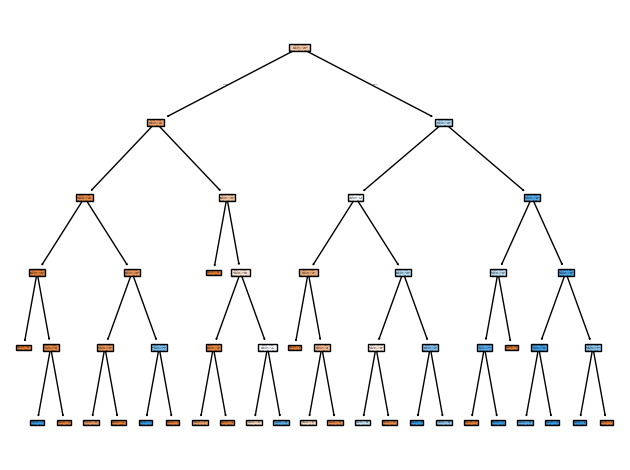

In [54]:
##  decision trree geaph 
from sklearn import tree
tree.plot_tree(best_model,filled=True)
plt.tight_layout()